<a href="https://colab.research.google.com/github/kyieon/Colab_DeepL/blob/master/Dacon7_300_0875_0778.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Dacon7')
!unzip data.zip
!ls

Archive:  data.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission.csv          
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
Dacon7.ipynb  data.zip	result.csv  submission.csv  test.csv  train.csv


In [82]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Activation
from keras.optimizers import RMSprop, Nadam
from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# 실제 이미지 보기
# test_df = pd.read_csv('test.csv', index_col=0)

# for i in range(5):  
#   img = np.array(test_df.iloc[i, 1:]).reshape(28, 28).astype(np.float)
#   plt.imshow(img)
#   plt.show()

In [57]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image 
        width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False
        )

In [132]:
# 트레이닝

train_df = pd.read_csv('train.csv', index_col=0)

x_train = np.array(train_df.iloc[:, 2:]).reshape(-1, 28, 28, 1).astype(np.float)
y_train = to_categorical(train_df['digit'].values.astype('int32'), 10)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.8)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Nadam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

EPOCHS = 300
BATCH_SIZE = 48

# hits = model.fit(
#   x_train, y_train, batch_size=BATCH_SIZE, 
#   epochs=EPOCHS, 
#   validation_data=(x_test, y_test),
#   verbose=1
# )

hits = model.fit(
  datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
  epochs=EPOCHS,
  validation_data=(x_test, y_test),
  verbose=1
)

# print(
#     f"resNET CNN : Epochs={EPOCHS:d}, " +
#     f"Train accuracy={max(hits.history['accuracy']):.4f}, " +
#     f"Validation accuracy={max(hits.history['val_accuracy']):.4f}"
# )



Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_234 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_226 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_278 (Dropout)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_227 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_279 (Dropout)        (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_236 (Conv2D)          (None, 7, 7, 128)       

resNET CNN : Epochs=300, Train accuracy=0.8578, Validation accuracy=0.7780


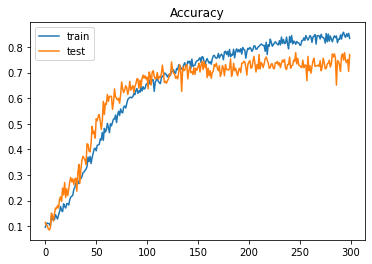

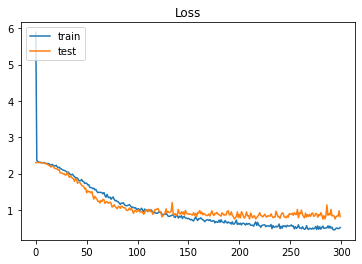

In [133]:

print(
    f"resNET CNN : Epochs={EPOCHS:d}, " +
    f"Train accuracy={max(hits.history['accuracy']):.4f}, " +
    f"Validation accuracy={max(hits.history['val_accuracy']):.4f}"
)

#예측모델 체크

acc = hits.history['accuracy']
val_acc = hits.history['val_accuracy']

plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

loss = hits.history['loss']
val_loss = hits.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
#예측하기
test_df = pd.read_csv('test.csv', index_col=0)
x_predict = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28, 1).astype(np.float)
results = np.argmax(model.predict(x_predict), axis=1)

In [52]:
#제출
submission_df = pd.read_csv('submission.csv', index_col=0)
submission_df.digit = results
submission_df.to_csv('result.csv')